In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.io import savemat, loadmat
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import tensorflow as tf
from keras.models import Model
from keras.applications import Xception # TensorFlow ONLY
from keras.applications.inception_v3 import preprocess_input
from keras.applications.imagenet_utils import decode_predictions
from keras.preprocessing.image import img_to_array, load_img

Using TensorFlow backend.


In [2]:
# For predictions using base model
xception = Xception(weights='imagenet') # For classification usage

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
# list of conv layers
"""
for layer in xception.layers:
    # check for convolutional layer
    if 'conv' in layer.name:
        print(layer.name)
"""

"\nfor layer in xception.layers:\n    # check for convolutional layer\n    if 'conv' in layer.name:\n        print(layer.name)\n"

In [4]:
# Save model summary to text
"""
from contextlib import redirect_stdout
with open('xception_summary_with_top_dense_layer.txt', 'w') as f:
    with redirect_stdout(f):
        xception.summary()
"""

"\nfrom contextlib import redirect_stdout\nwith open('xception_summary_with_top_dense_layer.txt', 'w') as f:\n    with redirect_stdout(f):\n        xception.summary()\n"

### Load Datasets

In [5]:
chair_batch_0 = loadmat("C:\\Users\\ustundag\\GitHub\\2D-3D-Semantics\\noXYZ_area_3_no_xyz_data_ChairRegions_299x299_BatchSize_1000_BatchNo_0.mat")
chair_batch_0 = chair_batch_0["regions"]
print(chair_batch_0.shape)
chair_batch_1 = loadmat("C:\\Users\\ustundag\\GitHub\\2D-3D-Semantics\\noXYZ_area_3_no_xyz_data_ChairRegions_299x299_BatchSize_1000_BatchNo_1.mat")
chair_batch_1 = chair_batch_1["regions"]
print(chair_batch_1.shape)
chair_batch_2 = loadmat("C:\\Users\\ustundag\\GitHub\\2D-3D-Semantics\\noXYZ_area_3_no_xyz_data_ChairRegions_299x299_BatchSize_791_BatchNo_2.mat")
chair_batch_2 = chair_batch_2["regions"]
print(chair_batch_2.shape)

(1002, 268203)
(1001, 268203)
(791, 268203)


In [6]:
chair_batches = np.concatenate((chair_batch_0, chair_batch_1))
chair_batches = np.concatenate((chair_batches, chair_batch_2))
chair_batches.shape

(2794, 268203)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


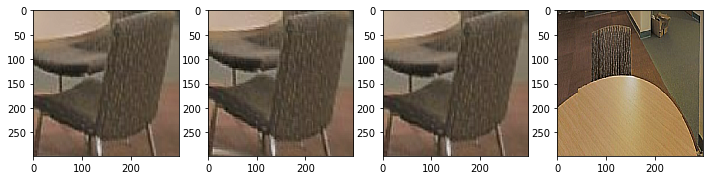

In [8]:
%matplotlib inline
plt.figure(figsize=(12, 12))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(chair_batches[i+1111].reshape(299, 299, 3))
plt.show()

### Feature Extraction

In [21]:
layer = 'block14_sepconv2' # last layer = 'block14_sepconv2_act' with features.shape = (1, 10, 10, 2048)
# For feature extraction usage with 3 different ways
#xception_f = Xception(weights='imagenet', include_top=False)
#xception_f = Model(xception.inputs, xception.layers[-3].output) # remove dense & avg_pool layers at the end of model
xception_f = Model(xception.inputs, xception.layers[-2].output) # remove only dense layer at the end of model
#xception_f = Model(xception.input, xception.get_layer(layer).output)

In [17]:
img = chair_batches.reshape(chair_batches.shape[0], 299, 299, 3)
x = preprocess_input(img)
features = xception_f.predict(x)
print(features.shape)
"""
features = np.ndarray(shape=(0, xception_f.output_shape[1]))
for batch in chair_batches:
    img = batch.reshape(batch.shape[0], 299, 299, 3)
    x = preprocess_input(img)
    sub_features = xception_f.predict(x)
    print(sub_features.shape)
    features = np.concatenate((features, sub_features))
print(features.shape)
"""

(2794, 10, 10, 2048)


'\nfeatures = np.ndarray(shape=(0, xception_f.output_shape[1]))\nfor batch in chair_batches:\n    img = batch.reshape(batch.shape[0], 299, 299, 3)\n    x = preprocess_input(img)\n    sub_features = xception_f.predict(x)\n    print(sub_features.shape)\n    features = np.concatenate((features, sub_features))\nprint(features.shape)\n'

In [18]:
savemat('noXYZ_area_3_no_xyz_data_chairs_299x299_2794_features_layer_block14_sepconv2.mat', {'features': np.array(features)})

In [ ]:
# example plot
square = 3
for fmap in features:
    ix = 1
    for _ in range(square):
        for _ in range(square):
            ax = plt.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            plt.imshow(fmap[:, :, ix-1], cmap='gray')
            ix += 1
    break
    plt.show()

### Trivial